In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set()

np.random.seed(42)

In [3]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
#Average classroom time for control group
control = df.query('group == "control"')['total_days'].mean()

#Average classroom time for Experiment group
experiment = df.query('group == "experiment"')['total_days'].mean()

#Observed difference
obs_diff = experiment - control

print(' Avg Classroom time Control: {}\n\n Avg Classroom time Experiment: {}\n\n Observed difference: {}'\
      .format(control, experiment, obs_diff))


 Avg Classroom time Control: 73.36899038461539

 Avg Classroom time Experiment: 74.6715935334873

 Observed difference: 1.3026031488719099


In [5]:

bt_samples = []
for i in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control_sample = sample.query('group == "control"')['total_days'].mean()
    experiment_sample = sample.query('group == "experiment"')['total_days'].mean()
    bt_samples.append(experiment_sample - control_sample)


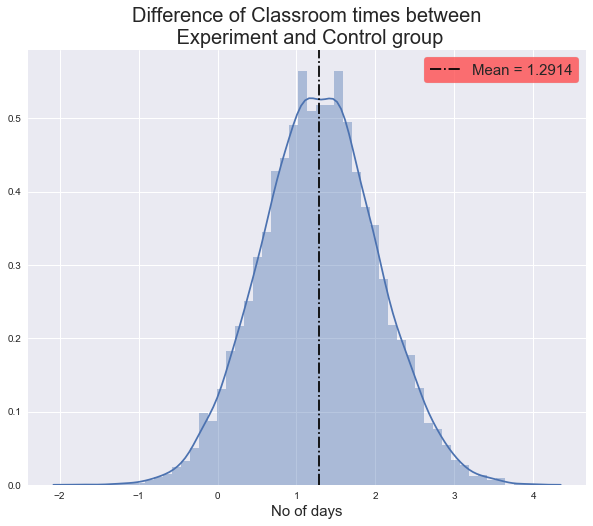

In [18]:
plt.figure(figsize=(10,8))
#plt.hist(bt_samples)
sns.distplot(bt_samples)
plt.xlabel('No of days', fontsize=15)
plt.title('Difference of Classroom times between\n Experiment and Control group', fontsize=20)
plt.axvline(np.mean(bt_samples), linestyle='-.', color='k', label='Mean = {:.4f}'.format(np.mean(bt_samples)))
plt.legend(frameon=True, fontsize=15, facecolor='#FF4E50', framealpha=0.8);


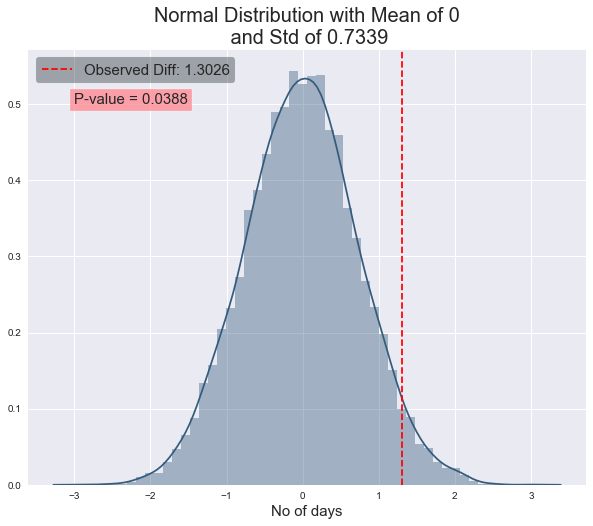

In [19]:
null_vals = np.random.normal(0, np.std(bt_samples), size=len(bt_samples))

#p-value
p = (null_vals > obs_diff).mean()

plt.figure(figsize=(10, 8))
#plt.hist(null_vals, color='#355C7D')
sns.distplot(null_vals, color='#355C7D')
plt.xlabel('No of days', fontsize=15)
plt.title('Normal Distribution with Mean of 0\n and Std of {:.4f}'.format(np.std(bt_samples)), fontsize=20)
plt.axvline(obs_diff, color='r', linestyle='--', label='Observed Diff: {:.4f}'.format(obs_diff))
plt.legend(frameon=True, facecolor='#2A363B', framealpha=0.4, fontsize=15)
plt.text(-3, 0.5, s='P-value = {}'.format(p), fontsize=15, bbox=dict(facecolor='#FF8C94', alpha=0.8, edgecolor='w'));